**Teste**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

patients_data = pd.read_csv('heart_2022_with_nans.csv')
patients_data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


informações sobre as variáveis quantitativas

In [4]:
patients_data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


gráficos

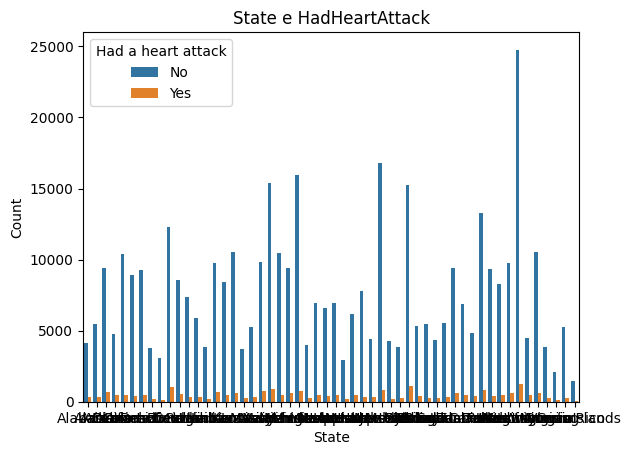

In [29]:
# Criar um gráfico de contagem
sns.countplot(data=patients_data, x='State', hue='HadHeartAttack')

# Configurar o título e os rótulos
plt.title('State e HadHeartAttack')
plt.xlabel('State', )
plt.ylabel('Count')
plt.legend(title='Had a heart attack')

# Mostrar o gráfico
plt.show()

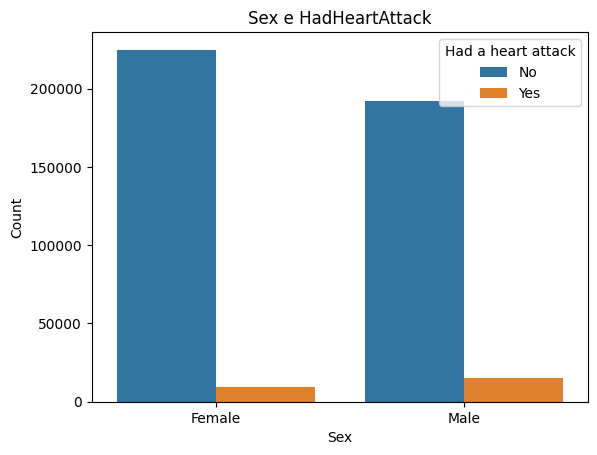

In [24]:
# Criar um gráfico de contagem
sns.countplot(data=patients_data, x='Sex', hue='HadHeartAttack')

# Configurar o título e os rótulos
plt.title('Sex e HadHeartAttack')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Had a heart attack')

# Mostrar o gráfico
plt.show()

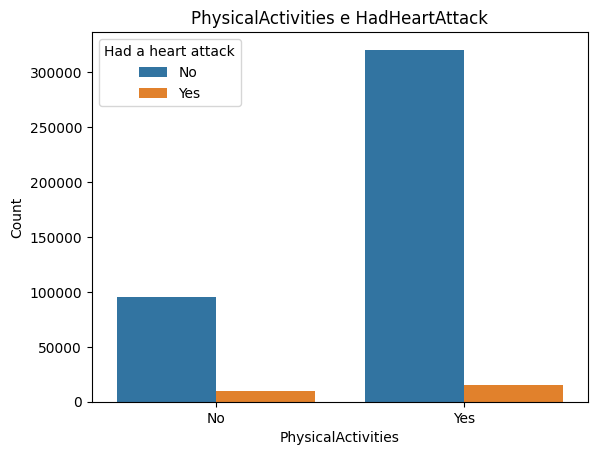

In [14]:
# Criar um gráfico de contagem
sns.countplot(data=patients_data, x='PhysicalActivities', hue='HadHeartAttack')

# Configurar o título e os rótulos
plt.title('PhysicalActivities e HadHeartAttack')
plt.xlabel('PhysicalActivities')
plt.ylabel('Count')
plt.legend(title='Had a heart attack')

# Mostrar o gráfico
plt.show()

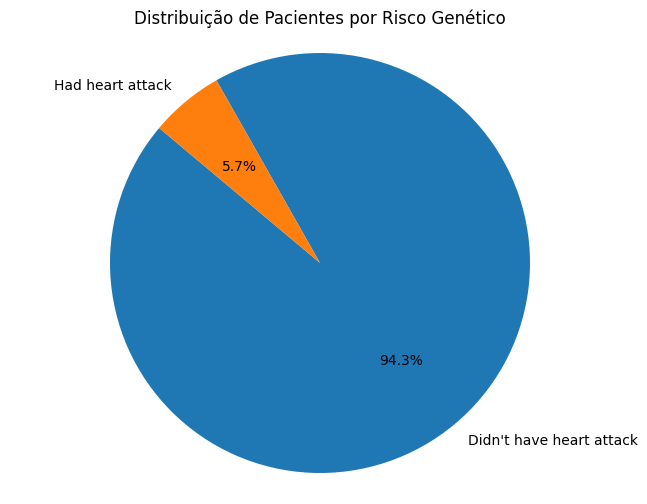

In [23]:
no = patients_data['HadHeartAttack'].value_counts().iloc[0]
yes = patients_data['HadHeartAttack'].value_counts().iloc[1]
has_heart_attack = yes / len(patients_data) * 100
no_heart_attack = no / len(patients_data) * 100

sizes = [no, yes]
labels = ["Didn't have heart attack", "Had heart attack"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de Pacientes por Risco Genético')
plt.show()

In [32]:
patients_who_had_heart_attacks = patients_data[(patients_data['HadHeartAttack'] == 'Yes')]
patients_who_had_heart_attacks

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
26,Alabama,Female,Fair,23.0,3.0,Within past year (anytime less than 12 months ...,Yes,8.0,NaN,Yes,...,1.68,105.23,37.45,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
31,Alabama,Male,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,Yes,4.0,NaN,Yes,...,1.88,86.18,24.39,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
32,Alabama,Female,Poor,14.0,14.0,Within past year (anytime less than 12 months ...,No,6.0,NaN,Yes,...,1.70,113.40,39.16,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
34,Alabama,Female,Fair,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,NaN,Yes,...,1.78,61.23,19.37,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445103,Virgin Islands,Female,Good,10.0,0.0,Within past year (anytime less than 12 months ...,No,12.0,None of them,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445107,Virgin Islands,Male,Fair,7.0,30.0,Within past year (anytime less than 12 months ...,No,4.0,None of them,Yes,...,1.88,117.93,33.38,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445109,Virgin Islands,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,Yes,...,1.35,36.29,20.02,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445115,Virgin Islands,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,Yes,...,1.80,118.84,36.54,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


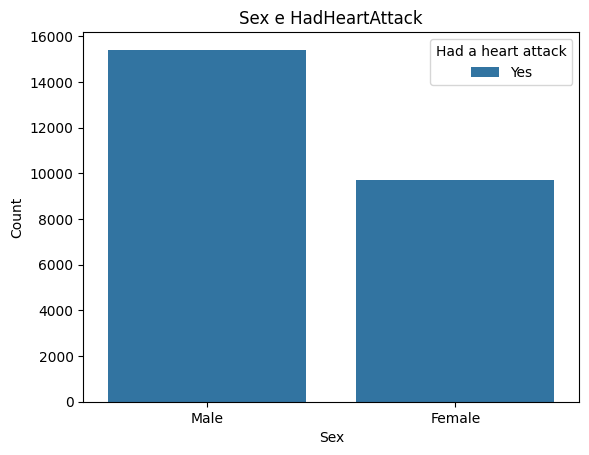

In [34]:
# Criar um gráfico de contagem
sns.countplot(data=patients_who_had_heart_attacks, x='Sex', hue='HadHeartAttack')

# Configurar o título e os rótulos
plt.title('Sex e HadHeartAttack')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Had a heart attack')

# Mostrar o gráfico
plt.show()

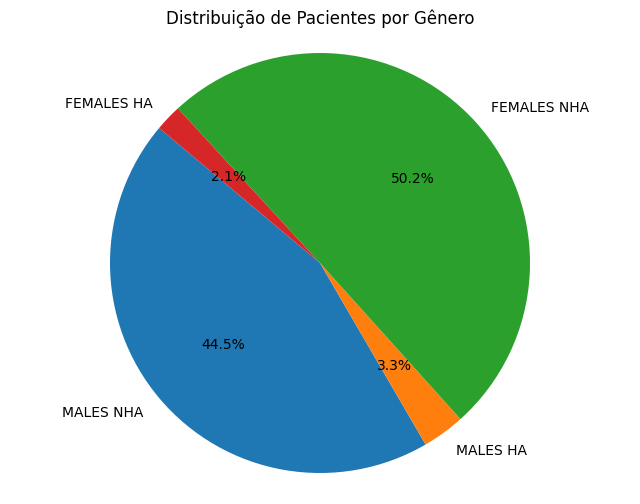

In [56]:
males_that_had_heart_attacks = len(patients_who_had_heart_attacks[(patients_who_had_heart_attacks['Sex'] == 'Male')])
females_that_had_heart_attacks = len(patients_who_had_heart_attacks[(patients_who_had_heart_attacks['Sex'] == 'Female')])

total_males = len(patients_data[(patients_data['Sex'] == 'Male')])
total_females = len(patients_data[(patients_data['Sex'] == 'Female')])

males_that_didnt_had_heart_attacks = total_males - males_that_had_heart_attacks * 100 / len(patients_data)
females_that_didnt_had_heart_attacks = total_females - females_that_had_heart_attacks * 100 / len(patients_data)

males_that_had_heart_attacks_percentage = males_that_had_heart_attacks * 100 / len(patients_data)
females_that_had_heart_attacks_percentage = females_that_had_heart_attacks * 100 / len(patients_data)

sizes = [males_that_didnt_had_heart_attacks, males_that_had_heart_attacks, females_that_didnt_had_heart_attacks, females_that_had_heart_attacks]
# sizes = [males_that_had_heart_attacks_percentage, females_that_had_heart_attacks_percentage]

labels = ["MALES NHA", "MALES HA", "FEMALES NHA", "FEMALES HA"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de Pacientes por Gênero')
plt.show()

In [58]:
patients_data.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


In [57]:
sns.pairplot(patients_data, hue='HadHeartAttack');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d1b39c6d090> (for post_execute):


KeyboardInterrupt: 